In [44]:

import numpy as np
import matplotlib.pyplot as plt
import gzip
# Used for Loading MNIST
from struct import unpack


#Data Modelling

In [45]:

# https://gist.github.com/mGalarnyk/aa79813d7ecb0049c7b926d53f588ae1
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)


In [46]:
def replaceZeroes(data):
    min_nonzero = min(data[np.nonzero(data)]) 
    data[data == 0] = min_nonzero
    return data


In [47]:
train_img, train_lbl = loadmnist(
    'data/train-images-idx3-ubyte.gz', 'data/train-labels-idx1-ubyte.gz')
test_img, test_lbl = loadmnist(
    'data/t10k-images-idx3-ubyte.gz', 'data/t10k-labels-idx1-ubyte.gz')

In [48]:
print(train_img.shape)

(60000, 784)


In [49]:
print(train_lbl.shape)

(60000,)


In [50]:
print(test_img.shape)

(10000, 784)


In [51]:
print(test_lbl.shape)

(10000,)


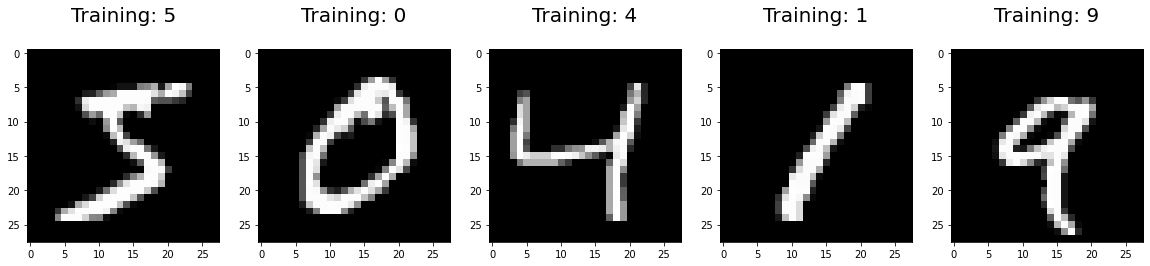

In [52]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)


In [53]:
# This is how the computer sees the number 5
print(train_img[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

#Logistic Regression

In [54]:

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(train_img, train_lbl)
logisticRegr.predict(test_img[0].reshape(1, -1))
logisticRegr.predict(test_img[0:10])


C:\Users\kaush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

#Performance Evaluation

In [55]:
# this is accuracy
score = logisticRegr.score(test_img, test_lbl)
print("Accuracy: "+ str(score))


Accuracy: 0.9255


##Confusion Matix

In [56]:
from sklearn import metrics
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 0.925')

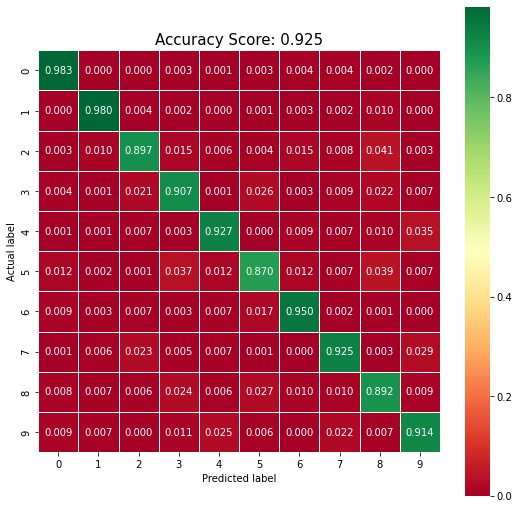

In [57]:
predictions = logisticRegr.predict(test_img)
cm = metrics.confusion_matrix(test_lbl, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9, 9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f",
            linewidths=.5, square=True, cmap='RdYlGn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size=15)
